In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Basic Stats

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Data Cleaning

There are three columns with missing values: Teacher Quality, Parental Education Level, and Distance from Home

We believe that the Distance from Home column is not a significant factor for determining a student's exam score (see boxplot below). Thus, we have decided to drop this column completely from our dataset, which will allow us to keep more rows from the original data.

The total number of missing values among the other two columns is 162, which only accounts for 2.45% of the data. We believe that this is not a significant amount, and therefore, we have decided to drop these rows. After doing this, we would still have 6,445 out of the original 6,607 data points.

Analyzing the numeric variables, the only unusual value that we observed is a single Exam Score of 101. We don't know exactly what caused this value, but we are going to change it to 100 because we want our exam scores to range from 0 to 100.

<Axes: xlabel='Distance_from_Home', ylabel='Exam_Score'>

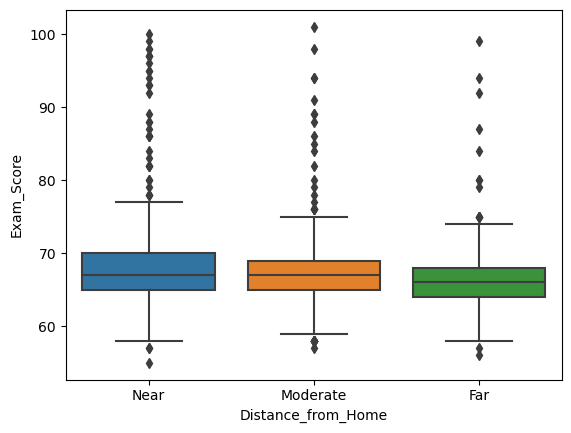

In [6]:
sns.boxplot(data=df, x='Distance_from_Home', y='Exam_Score')

In [7]:
df.groupby('Distance_from_Home')['Exam_Score'].mean()

Distance_from_Home
Far         66.457447
Moderate    66.981481
Near        67.512101
Name: Exam_Score, dtype: float64

The boxplot above shows very similar values between the exam scores across students' distance between home and school. This is confirmed by the similarity in the mean exam scores across this variable, so we are okay dropping this column completely.

In [8]:
df = df[~(df['Distance_from_Home'].isna())]

In [9]:
# Number of rows with missing values remaining
df.loc[df.isna().any(axis=1), ['Teacher_Quality', 'Parental_Education_Level']].shape[0]

162

In [10]:
# Percent of rows with missing values
162*100/6607

2.451944906916906

In [11]:
# Remaining number of rows if we dropped all missing values
6607-162

6445

In [12]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000
mean,19.984862,79.998471,7.031346,75.072936,1.494190,2.970031,67.243884
std,5.993261,11.548299,1.468462,14.392315,1.230865,1.030067,3.896073
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


The only unusual number from this table is that a student earned an exam score of 101. All other range of values seem plausible.

In [13]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

In [14]:
df.to_csv('StudentPerformanceFactorsCleaned.csv', index=False)

## Exploratory Data Analysis

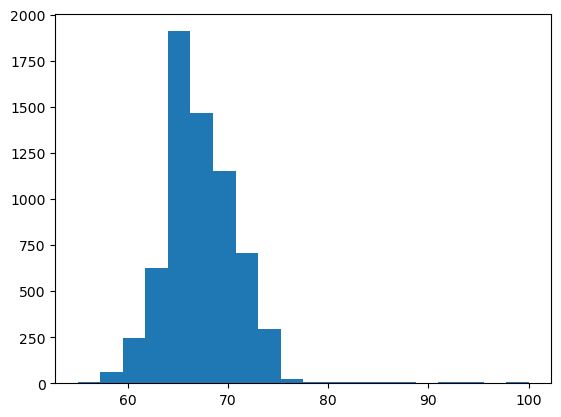

In [15]:
plt.hist(df['Exam_Score'], bins=20)
plt.show()

The distribution of exam scores is skewed to the right with a median of 67 and mean of 67.24

Let's now take a look at the correlations between the numeric variables in our dataset.

In [16]:
df.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009782,0.010063,0.023795,-0.013684,0.004732,0.445120
Attendance,-0.009782,1.000000,-0.017095,-0.021537,0.012512,-0.018774,0.580596
Sleep_Hours,0.010063,-0.017095,1.000000,-0.022706,-0.011618,0.000116,-0.017620
Previous_Scores,0.023795,-0.021537,-0.022706,1.000000,-0.011073,-0.009198,0.173889
Tutoring_Sessions,-0.013684,0.012512,-0.011618,-0.011073,1.000000,0.016629,0.155778
Physical_Activity,0.004732,-0.018774,0.000116,-0.009198,0.016629,1.000000,0.029000
Exam_Score,0.445120,0.580596,-0.017620,0.173889,0.155778,0.029000,1.000000


<Axes: >

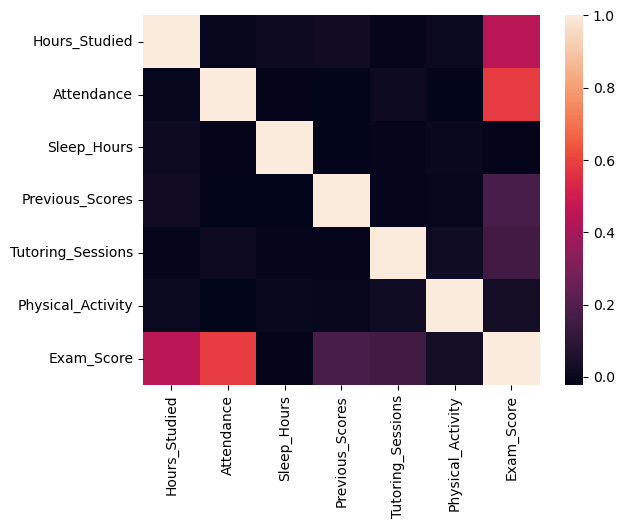

In [17]:
sns.heatmap(df.corr())

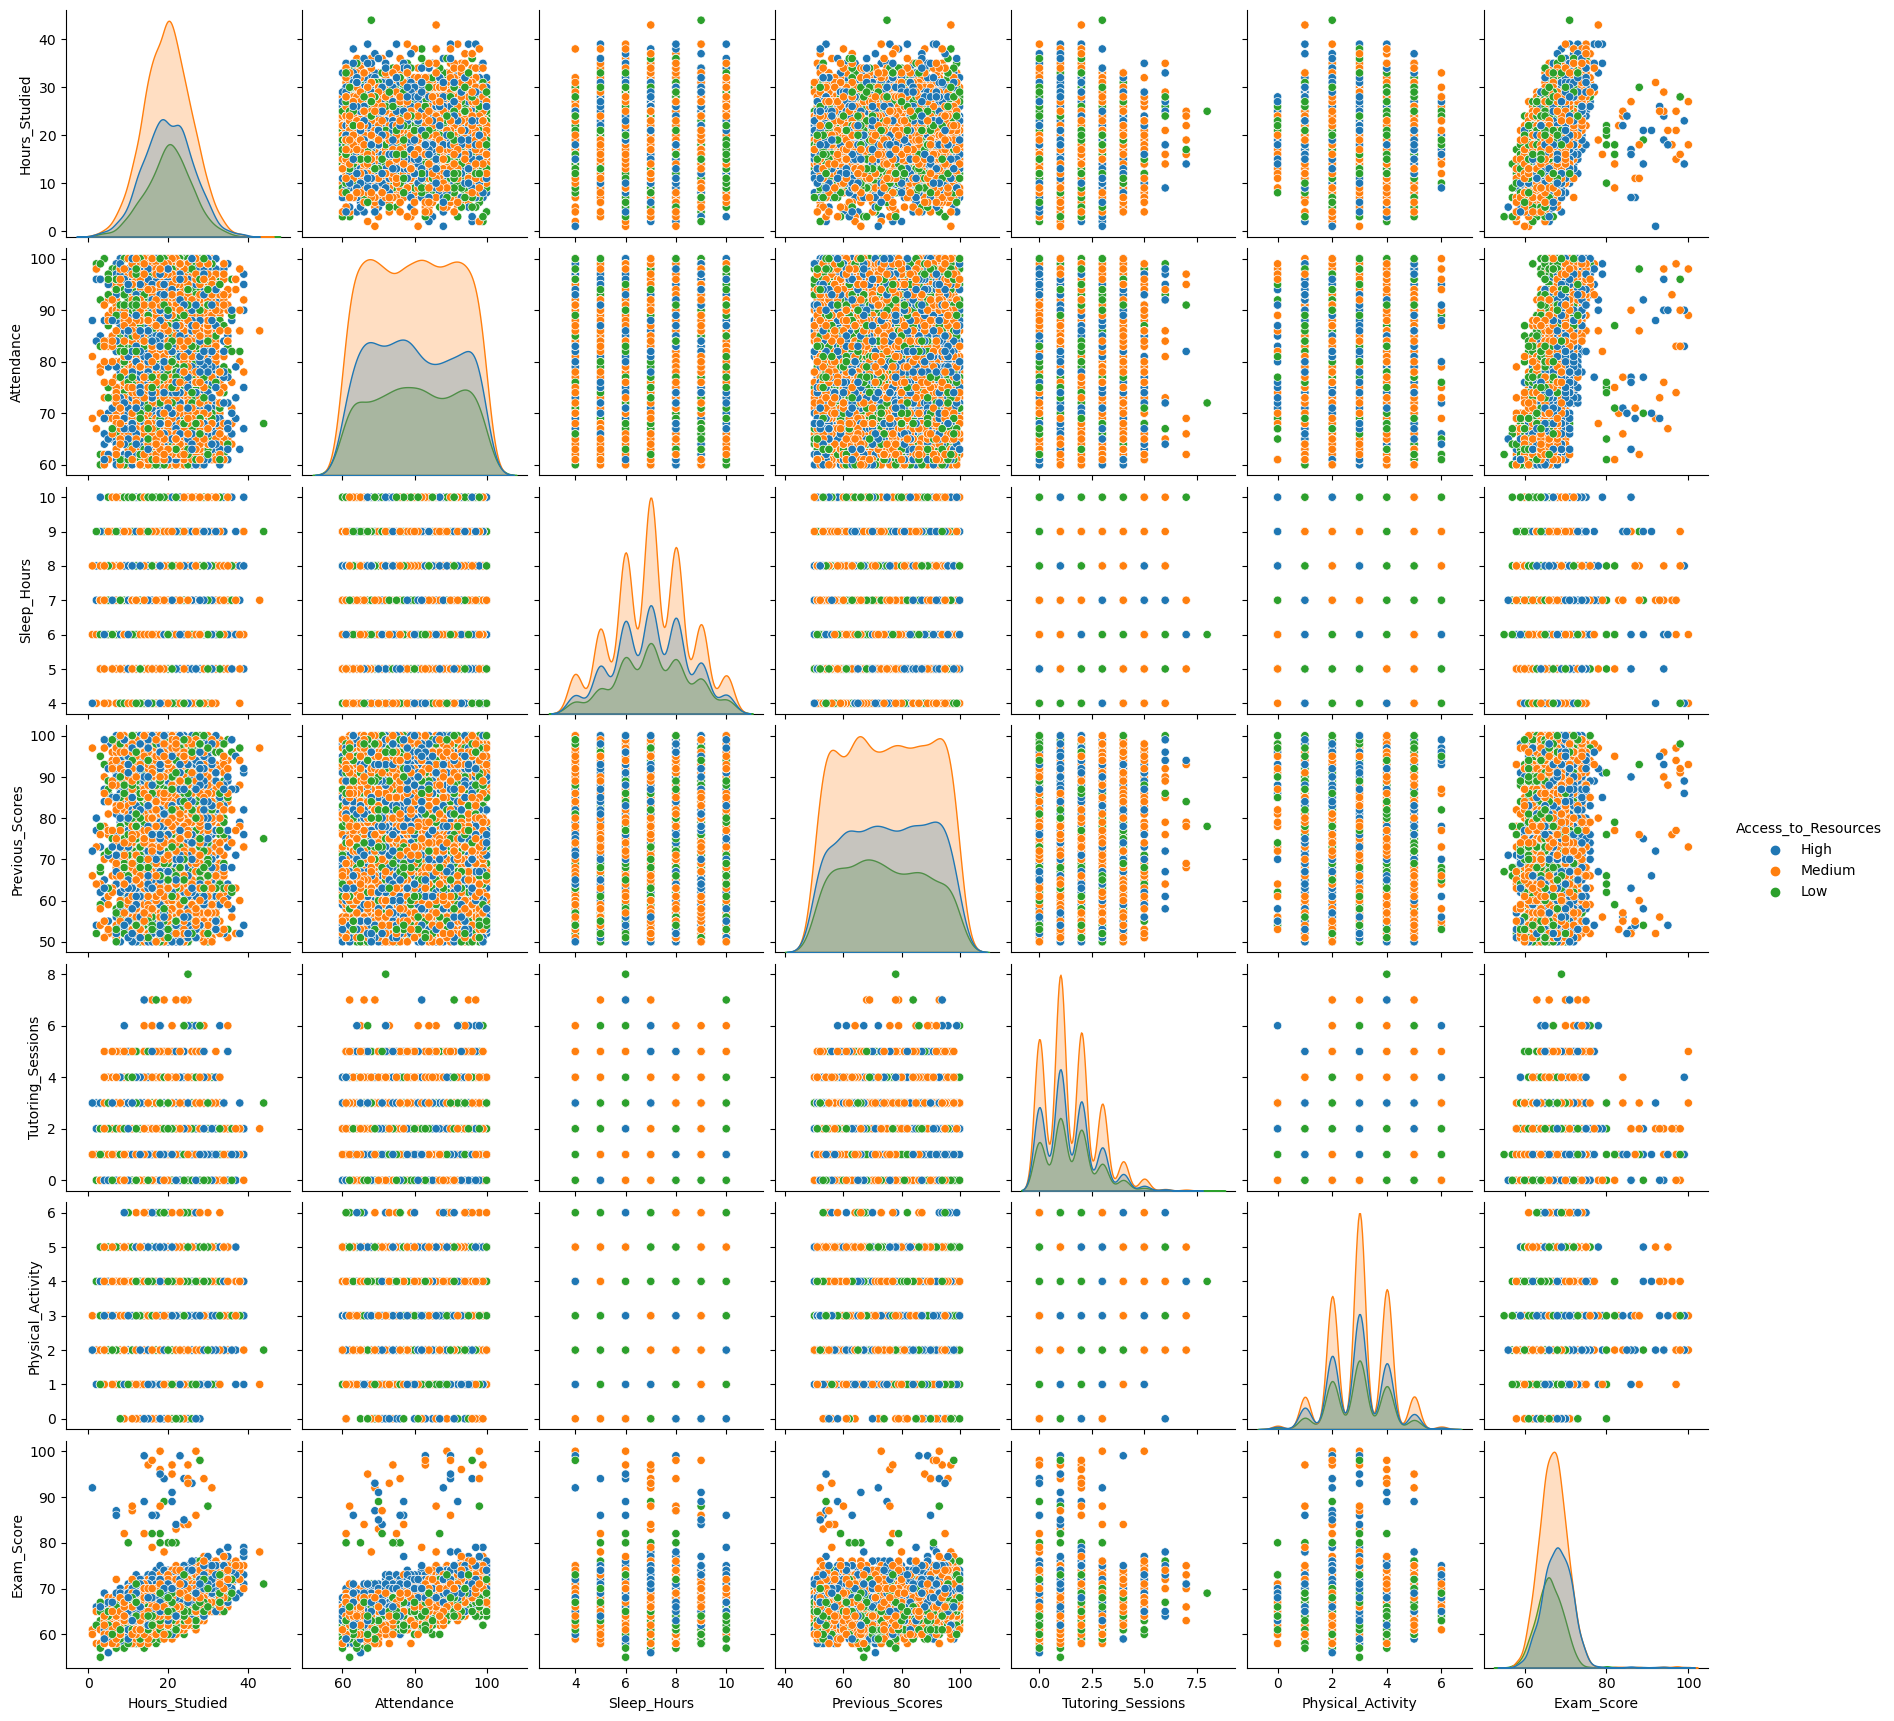

In [18]:
sns.pairplot(df, hue = 'Access_to_Resources')
plt.show()

There seems to be some sort of separation/difference among the exam scores of students based on the students' access to resources. We can see this further in the boxplot below. It seems that students with higher access to resources score slightly better on their exams.

<Axes: xlabel='Access_to_Resources', ylabel='Exam_Score'>

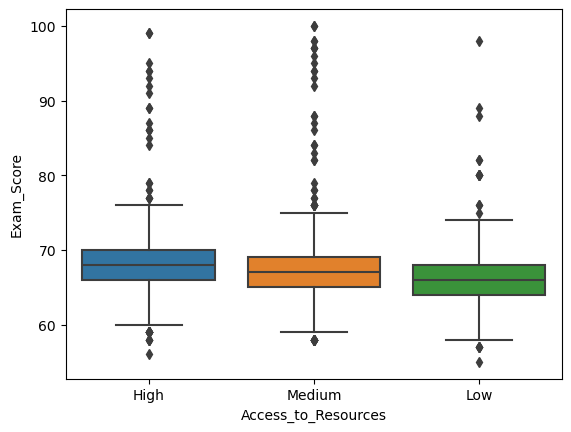

In [19]:
sns.boxplot(data=df, x='Access_to_Resources', y='Exam_Score')

While many of the relationships show weak correlation, there seem to be a group of students who score above 80% on the exams despite the other variables. However, when we look at students who scored below 80%, some relationships begin to stand out more.

In [20]:
below_80 = df.loc[df['Exam_Score'] < 80]

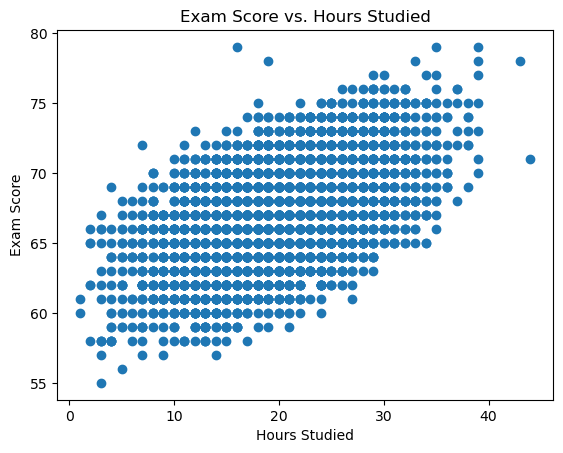

In [21]:
plt.scatter(below_80['Hours_Studied'], below_80['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Hours Studied')
plt.show()

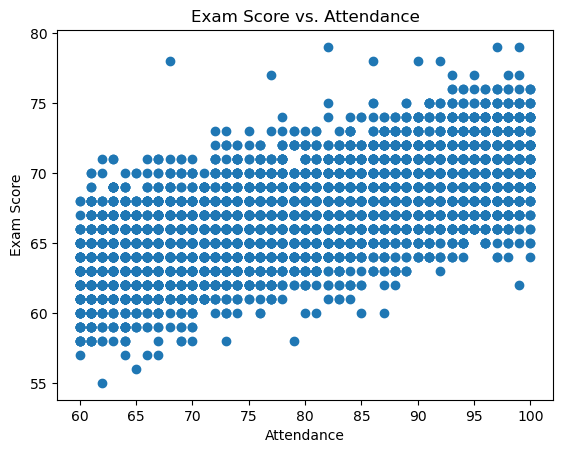

In [22]:
plt.scatter(below_80['Attendance'], below_80['Exam_Score'])
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Attendance')
plt.show()